In [108]:
                                              #Assignment 2 Part 1
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
from collections import Counter
from math import sqrt
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


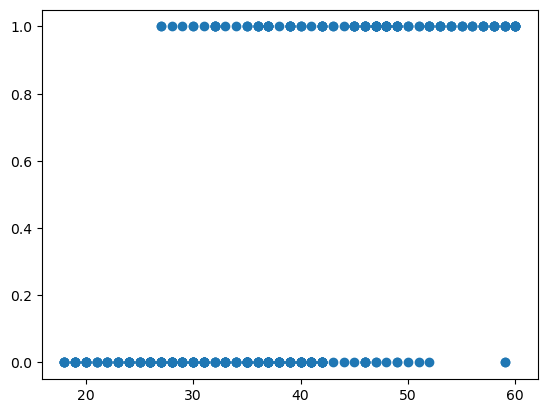

In [55]:
plt.scatter(data['Age'],data['Purchased'])
plt.show()
X_train, X_test, Y_train , Y_test = train_test_split(data['Age'],data['Purchased'],test_size=0.3)


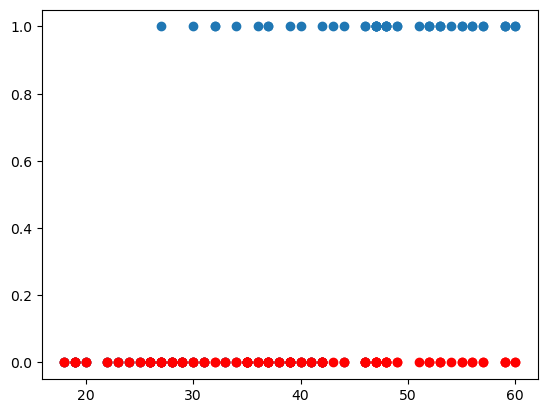

Accuracy () = 0.6083333333333333


In [66]:
                                        #Logistic Regression 
    
plt.scatter(data['Age'], data['Purchased'])

X_train, X_test, Y_train, Y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.3, random_state=42)


def logistic_regression(X, Y, learning_rate=0.001, epochs=300):
    b0, b1 = 0, 0
    
    for epoch in range(epochs):
        y_pred = pred(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        
        b0 = b0 - learning_rate * D_b0
        b1 = b1 - learning_rate * D_b1

    return b0, b1


b0_no_norm, b1_no_norm = logistic_regression(X_train, Y_train)


y_pred_no_norm = pred(X_test, b0_no_norm, b1_no_norm)
y_pred_no_norm = [1 if p >= 0.5 else 0 for p in y_pred_no_norm]


plt.clf()
plt.scatter(X_test, Y_test)
plt.scatter(X_test, y_pred_no_norm, c="red")
plt.show()


accuracy_no_norm = sum(y_pred_no_norm == Y_test) / len(y_pred_no_norm)
print(f"Accuracy () = {accuracy_no_norm}")


In [57]:
                                           #using normalization
    
def normalize(X):
    return X - X.mean()
def pred(X,b0,b1):
    return np.array([1/(1+exp(-1*b0+-1*b1*x))for x in X])
def logistic_regression(X,Y):
    
    X=normalize(X)
    b0=0
    b1=0
    L=0.001
    epochs=300
    
    for epochs in range(epochs):
        y_pred = pred(X,b0,b1)
        D_b0 = -2*sum((Y-y_pred)*y_pred*(1-y_pred))
        D_b1 = -2*sum(X*(Y-y_pred)*y_pred*(1-y_pred))
        
        b0 = b0-L*D_b0
        b1 = b1-L*D_b1
        return b0,b1
    

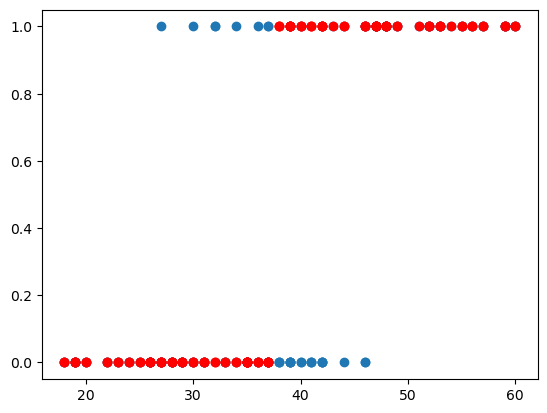

Accuracy = 0.7666666666666667


In [58]:
b0, b1 = logistic_regression(X_train,Y_train)
X_test_norm = normalize(X_test)
y_pred = pred(X_test_norm,b0,b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, Y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == Y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

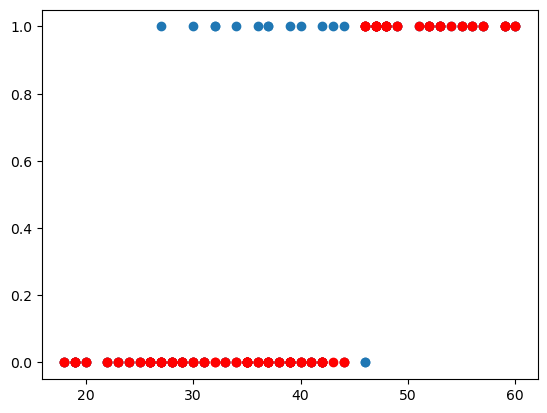

Accuracy (Standardized) = 0.875


In [104]:
                                              #Using Standardisation
X_train, X_test, Y_train, Y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.3, random_state=42)

def standardize(X):
    return (X - X.mean()) / X.std()


def logistic_regression_standardized(X, Y, learning_rate=0.001, epochs=300):
    X = standardize(X)
    b0, b1 = 0, 0
    
    for epoch in range(epochs):
        y_pred = pred(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        
        b0 = b0 - learning_rate * D_b0
        b1 = b1 - learning_rate * D_b1

    return b0, b1


b0_std, b1_std = logistic_regression_standardized(X_train, Y_train)


X_test_std = standardize(X_test)
y_pred_std = pred(X_test_std, b0_std, b1_std)
y_pred_std = [1 if p >= 0.5 else 0 for p in y_pred_std]


plt.clf()
plt.scatter(X_test, Y_test)
plt.scatter(X_test, y_pred_std, c="red")
plt.show()


accuracy_std = sum(y_pred_std == Y_test) / len(y_pred_std)
print(f"Accuracy (Standardized) = {accuracy_std}")


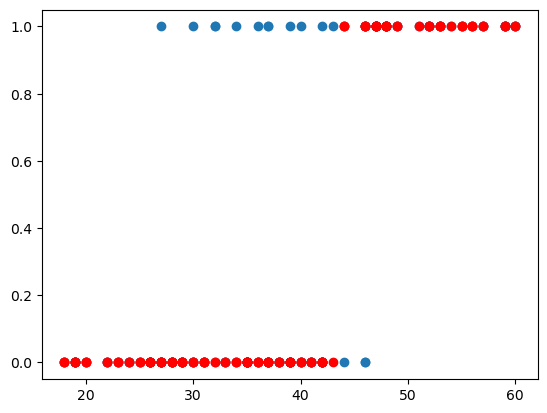

Accuracy  = 0.875


In [87]:
                               #Logistic Regression using Sklearn library
    



plt.scatter(data['Age'], data['Purchased'])


X_train, X_test, Y_train, Y_test = train_test_split(data[['Age']], data['Purchased'], test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


y_pred = logreg.predict(X_test)

plt.clf()
plt.scatter(X_test['Age'], Y_test)
plt.scatter(X_test['Age'], y_pred, c="red")
plt.show()


accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy  = {accuracy}")




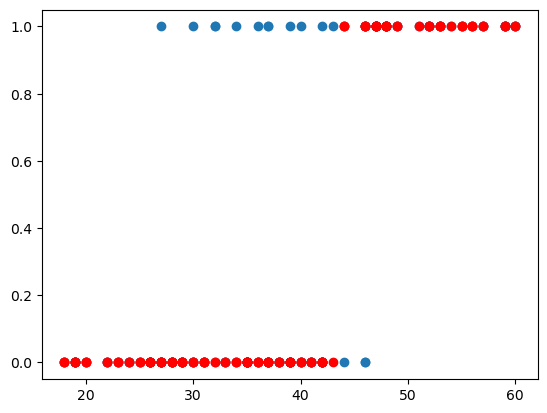

Accuracy ( Standardized ) = 0.875


In [88]:
                                          #Using standardisation    
    
X_train, X_test, Y_train, Y_test = train_test_split(data[['Age']], data['Purchased'], test_size=0.3, random_state= 42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

y_pred_scaled = logreg.predict(X_test_scaled)

plt.clf()
plt.scatter(X_test['Age'], Y_test)
plt.scatter(X_test['Age'], y_pred_scaled, c="red")
plt.show()


accuracy_scaled = accuracy_score(Y_test, y_pred_scaled)
print(f"Accuracy ( Standardized ) = {accuracy_scaled}")


In [42]:
                                     #Assignment 2 part 2
    
new = pd.read_csv('iris.csv')
new


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
new.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


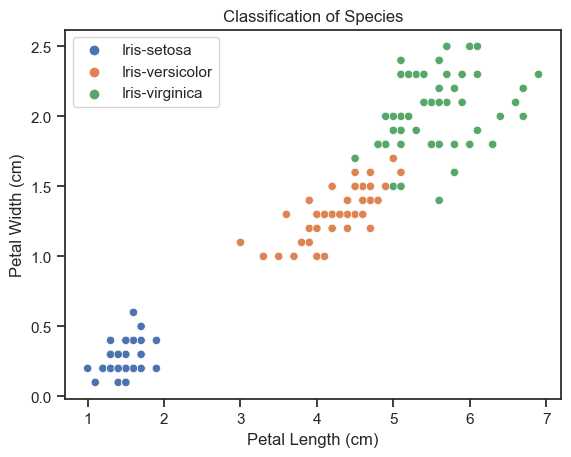

In [112]:
                                          # Plotting the Data

sns.set(style="ticks")
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=new)
plt.title('Classification of Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


Predicted Label: Iris-versicolor
Accuracy: 0.9777777777777777


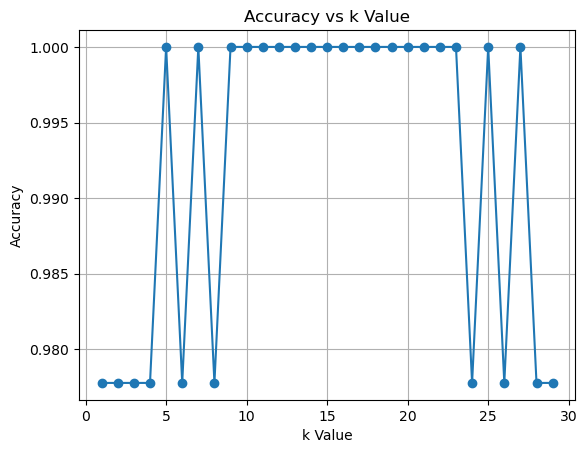

In [101]:
                                # Implementing KNN from Scratch
    
X = new.iloc[:, :-1].to_numpy()
Y = new.iloc[:,-1].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)


def euclidean_distance(x1, x2):
    return sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, Y_train, X_test, k):
    distances = [euclidean_distance(x, X_test) for x in X_train]
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = Y_train[k_nearest_indices]

    
    most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

    return most_common_label

k_value = 3
predicted_label = knn(X_train, Y_train, X_test, k_value)
print(f"Predicted Label: {predicted_label}")

def predict(X_train, Y_train, X_test, k):
    predictions = [knn(X_train, Y_train, x_test, k) for x_test in X_test]
    return predictions

def accuracy(y_test, y_pred):
    correct = sum(1 for true, pred in zip(y_test, y_pred) if true == pred)
    accuracy = correct / len(y_test)
    return accuracy




predicted_labels = predict(X_train, Y_train, X_test, k_value)
accuracy_value = accuracy(Y_test_2, predicted_labels)
print(f"Accuracy: {accuracy_value}")


k_value = range(1, 30)

accuracy_2 = []


for k in k_values:
    y_pred = predict(X_train, Y_train, X_test, k)
    accuracy_2.append(accuracy(Y_test_2, y_pred))

                                             # Plotting K value vs Accuracy
        
plt.plot(k_values, acc, marker='o')
plt.title('Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()





Accuracy: 1.0
Predicted Label: Iris-versicolor


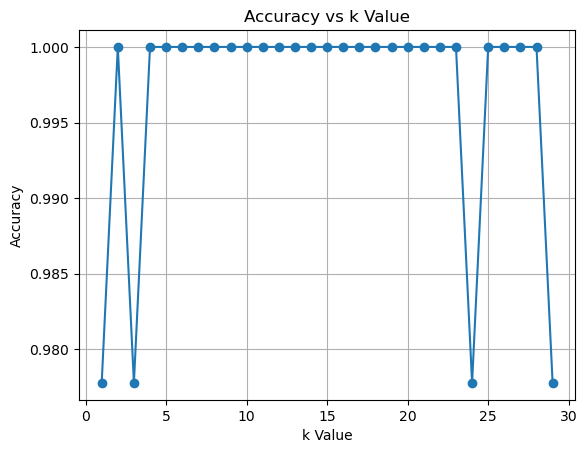

In [102]:
                            # Implementing KNN using Sklearn Library
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)


X_train, X_test = X_train.astype(np.float64), X_test.astype(np.float64)


k_value = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train, Y_train)
y_pred = knn_classifier.predict(X_test)


accuracy_value = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy_value}")


k_values = range(1, 30)
predicted_label = k_nearest_neighbors(X_train, Y_train, X_test, k_value)
print(f"Predicted Label: {predicted_label}")
accuracies = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(Y_test, y_pred))
         
                                        # Plotting K Value vs Accuracy
            
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


